In [27]:
import numpy as np
import matplotlib.pyplot as plt
data=np.loadtxt(open('.\machine-learning-exercise-master\coursera-machine-learning-python\ex2\ex2data2.txt','r'),delimiter=',')
X=data[:,0:2]
y=data[:,2]

In [28]:
def plot_data(X,y):
    pos=np.argwhere(y==1)
    neg=np.argwhere(y==0)
    plt.plot(X[pos,0],X[pos,1],linestyle='',marker='+',color='k')
    plt.plot(X[neg,0],X[neg,1],linestyle='',marker='o',color='y')

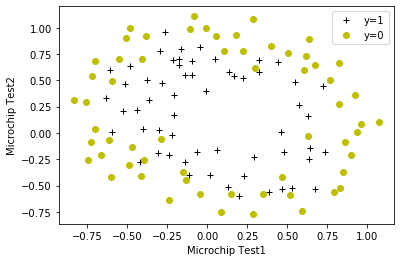

In [29]:
plt.figure()
plot_data(X,y)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.legend(['y=1','y=0'],loc='upper right',numpoints=1)
plt.show()

In [30]:
#定义map_feature()，增加特征的多项式乘积
def map_feature(X1,X2):
    degree=6
    out=np.ones(len(X1))
    for i in range(1,degree+1):
        for j in range(0,i+1):
            tmp=np.power(X1,i-j)*np.power(X2,j)
            out=np.vstack((out,tmp))
    return out.T

In [31]:
X=map_feature(X[:,0],X[:,1])

In [32]:
m,n=X.shape
initial_theta=np.zeros(n)
l=1.0

In [33]:
#定义带有正则项的logistic回归的损失函数和梯度
def cost_function_reg(theta,X,y,l):
    m,n=X.shape
    x_dot_theta=X.dot(theta)
    mask=np.eye(len(theta))
    mask[0,0]=0
    J=1.0/m*(np.dot(-y.T,np.log(sigmoid(x_dot_theta)))-np.dot((1-y).T,np.log(1-sigmoid(x_dot_theta))))+1.0*l/(2*m)*np.sum(np.power((mask.dot(theta)),2))
    grad=1.0/m*np.dot((sigmoid(x_dot_theta)-y).T,X).T+1.0*l/m*(mask.dot(theta))
    return J,grad
    

In [34]:
def sigmoid(z):
    g=1/(1+np.exp(-z))
    return g

In [35]:
cost,_=cost_function_reg(initial_theta,X,y,l)
print('Cost at initial theta:',cost)

Cost at initial theta: 0.6931471805599453


In [36]:
#正则和准确率
import scipy.optimize as opt
theta,nfeval,rc=opt.fmin_tnc(func=cost_function_reg,x0=initial_theta,args=(X,y,l))

In [37]:
def plot_decision_boundary(theta, X, y):
    if X.shape[1] <= 3:
        plot_X = np.array([np.amin(X[:, 1]) - 2, np.amax(X[:, 1]) + 2])
        plot_y = -1.0 / theta[2] * (theta[1] * plot_X + theta[0])
        plt.plot(plot_X, plot_y)
    else:
        u = np.linspace(-1, 1.5, 50)
        # u.resize((len(u), 1))
        v = np.linspace(-1, 1.5, 50)
        # v.resize((len(v), 1))
        z = np.zeros((len(u), len(v)))
        for i in range(len(u)):
            for j in range(len(v)):
                z[i, j] = map_feature(u[i:i+1], v[j:j+1]).dot(theta)
        z = z.T
        u, v = np.meshgrid(u, v)
        cs = plt.contour(u, v, z, levels=[0])
        fmt = {}
        strs = ['Decision boundary']
        for l, s in zip(cs.levels, strs):
            fmt[l] = s
        plt.clabel(cs, cs.levels[::2], inline=True, fmt=fmt, fontsize=10)

In [38]:
print(X)

[[ 1.00000000e+00  5.12670000e-02  6.99560000e-01 ...  6.29470940e-04
   8.58939846e-03  1.17205992e-01]
 [ 1.00000000e+00 -9.27420000e-02  6.84940000e-01 ...  1.89305413e-03
  -1.39810280e-02  1.03255971e-01]
 [ 1.00000000e+00 -2.13710000e-01  6.92250000e-01 ...  1.04882142e-02
  -3.39734512e-02  1.10046893e-01]
 ...
 [ 1.00000000e+00 -4.84450000e-01  9.99270000e-01 ...  2.34007252e-01
  -4.82684337e-01  9.95627986e-01]
 [ 1.00000000e+00 -6.33640000e-03  9.99270000e-01 ...  4.00328554e-05
  -6.31330588e-03  9.95627986e-01]
 [ 1.00000000e+00  6.32650000e-01 -3.06120000e-02 ...  3.51474517e-07
  -1.70067777e-08  8.22905998e-10]]


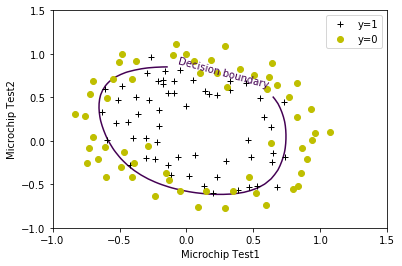

In [39]:
plt.figure()
plot_data(X[:,1:3],y)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.legend(['y=1','y=0'],loc='upper right',numpoints=1)
plot_decision_boundary(theta,X,y)
plt.show()

In [40]:
#预测输出数据
def predict(theta,X):
    p=sigmoid(X.dot(theta))>=0.5
    return p.astype(int)

In [41]:
p=predict(theta,X)
print('Train Accuracy:',np.mean(p==y)*100)

Train Accuracy: 83.05084745762711
